In [1]:
# General imports
import matplotlib.pyplot as plt
import numpy as np

# Imports from our library!
from indecision import particle, simulation

In [2]:
# Example particle
p = particle.MonoLigandParticle(
    receptor_density=0.009,
    binding_strength=1,
    on_rate=1, off_rate=1
)

# Mono-ligand

In [29]:
# Define a quick extractor (TODO: This should be provided by the library)
def extractor(states: list) -> float:
    N = len(states)
    attached = len(list(filter(lambda state: state.is_attached, states)))

    return attached / N

convergence = simulation.convergence.ConvergenceCriterion(
    metric=lambda a, b: np.abs(a.is_attached - b.is_attached),
    tolerance=0.01,
    window_size=10,
    sample_size=100,
)

N = 1000

def theta(receptor_density: float) -> float:
    p = particle.MonoLigandParticle(
        receptor_density=receptor_density,
        binding_strength=1,
        on_rate=1, off_rate=1
    )
    
    bind_ratios = [b for b in simulation.simulate_until(
        particle=p,
        number_of_particles=N,
        extractor=extractor,
        # convergence=convergence,
        steps=1000,
    )]

    return bind_ratios[-1]

In [30]:
import time

start = time.time()

# Calculate the thetas for different receptor densities
receptor_densities = np.linspace(0.01, 1, num=50)
thetas = [theta(rd) for rd in receptor_densities]

end = time.time()
print(f"Took {end - start}")

Took 91.94554805755615


[-3.00724920e-05  5.26366608e-01]


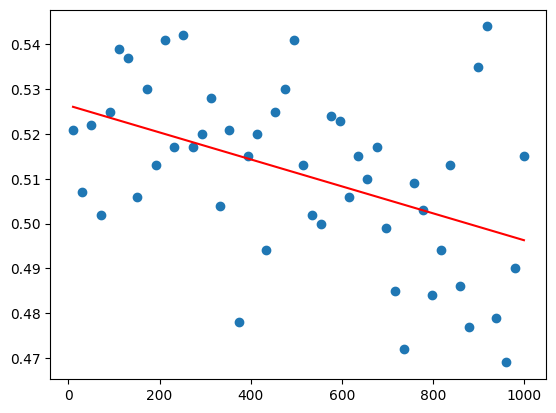

<Figure size 640x480 with 0 Axes>

In [32]:
x = receptor_densities * N

# Plot it. We expect a linear relation for mono-ligand particles. 
# plt.xscale('log')
# plt.yscale('log')
plt.scatter(receptor_densities * N, thetas)

from scipy.optimize import curve_fit 

f = lambda x, a, b: a*x + b
[popt, pcov] = curve_fit(f, x, thetas)

print(popt)

plt.plot(x, f(x, *popt), color='red')
plt.show()

plt.savefig("Frenkel-2011/mono.png")

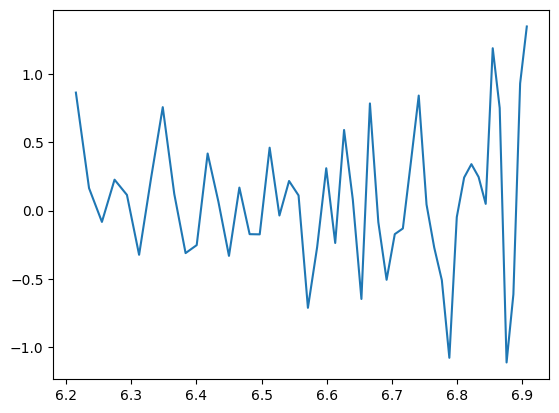

In [27]:
d_log_theta = np.gradient(np.log(thetas))
d_log_theta

d_log_nr = np.gradient(np.log(receptor_densities * N))
d_log_nr

selectivity = d_log_theta / d_log_nr

plt.plot(np.log(receptor_densities * N), selectivity)

# Mulit-ligand

Let's try with multi-ligand particles!

In [5]:
N = 1000

# Define a quick extractor (TODO: This should be provided by the library)
def extractor_multi(states: list) -> float:
    N = len(states)
    attached = len(list(filter(lambda state: state.attached_ligands > 0, states)))

    return attached / N

def theta_multi(receptor_density: float) -> float:
    p = particle.MultiLigandParticle(
        receptor_density=receptor_density,
        # binding_strength=1,
        rates=[
            (0.2, 0.2),
            (0.8, 0.8),
        ]
    )
    
    bind_ratios = [b for b in simulation.simulate_until(
        particle=p,
        number_of_particles=N,
        extractor=extractor_multi,
        # convergence=convergence,
        steps=1000,
    )]

    return bind_ratios[-1]

In [6]:
import time

start = time.time()

# Calculate the thetas for different receptor densities
receptor_densities_multi = np.linspace(0.5, 1, num=50)
thetas_multi = [theta_multi(rd) for rd in receptor_densities]

end = time.time()
print(f"Took {end - start}")

Took 92.41133308410645


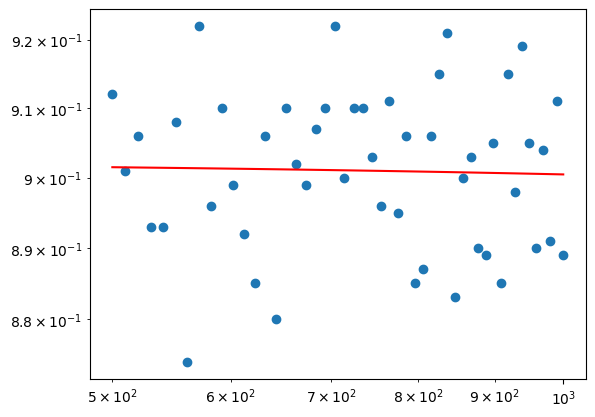

In [13]:
x = receptor_densities * N

plt.xscale('log')
plt.yscale('log')
plt.scatter(receptor_densities * N, thetas_multi)

from scipy.optimize import curve_fit 


f = lambda x, a, b: a*x + b
[popt, pcov] = curve_fit(f, x, thetas_multi)
plt.plot(x, f(x, *popt), color='red')
plt.show()